In [ ]:
!pip install -q tflite-model-maker

In [ ]:
!sudo apt-get install libportaudio2

In [7]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

INFO:tensorflow:Load image with size: 1353, num_label: 4, labels: .ipynb_checkpoints, Bed, Chair, Sofa.


INFO:tensorflow:Load image with size: 1353, num_label: 4, labels: .ipynb_checkpoints, Bed, Chair, Sofa.


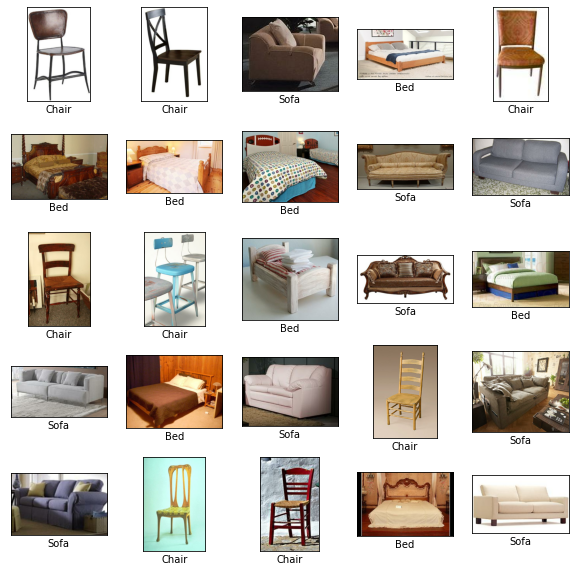

In [12]:
data = DataLoader.from_folder('/content/Sample_Data')

train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [13]:
model = image_classifier.create(train_data, validation_data=validation_data)

model.summary()

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_3 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 3,418,148
Trainable params: 5,124
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


33/33 [==============================] - 50s 1s/step - loss: 0.7538 - accuracy: 0.7822 - val_loss: 0.4957 - val_accuracy: 0.9556
Epoch 2/5
33/33 [==============================] - 47s 1s/step - loss: 0.4859 - accuracy: 0.9574 - val_loss: 0.4462 - val_accuracy: 0.9704
Epoch 3/5
33/33 [==============================] - 46s 1s/step - loss: 0.4607 - accuracy: 0.9650 - val_loss: 0.4392 - val_accuracy: 0.9778
Epoch 4/5
33/33 [==============================] - 46s 1s/step - loss: 0.4475 - accuracy: 0.9688 - val_loss: 0.4353 - val_accuracy: 0.9778
Epoch 5/5
33/33 [==============================] - 45s 1s/step - loss: 0.4395 - accuracy: 0.9744 - val_loss: 0.4332 - val_accuracy: 0.9778
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_3 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                             

In [14]:
loss, accuracy = model.evaluate(test_data)

5/5 [==============================] - 6s 838ms/step - loss: 0.4214 - accuracy: 0.9926


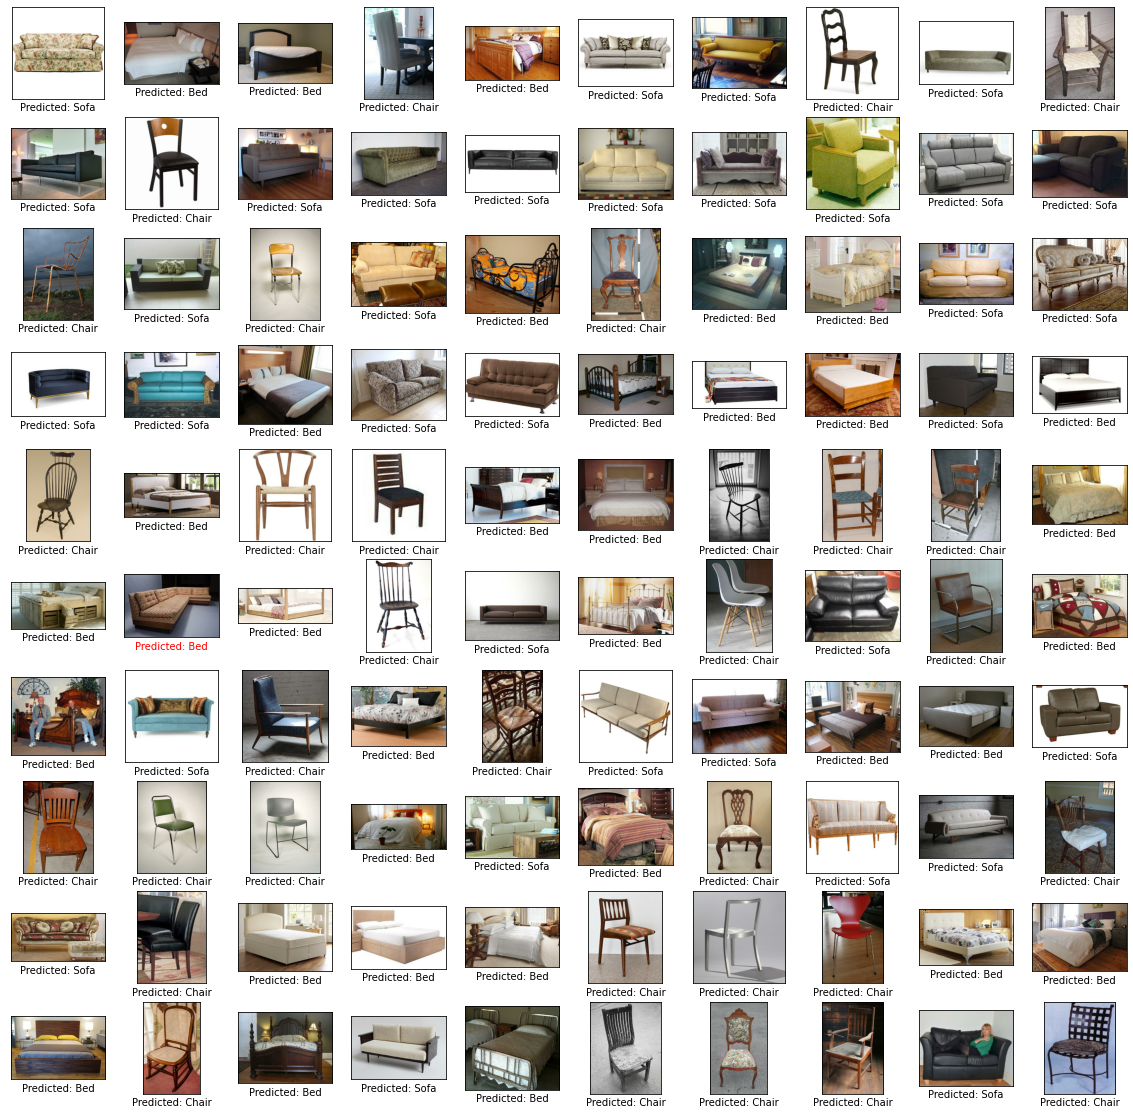

In [15]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()